<a href="https://colab.research.google.com/github/swapnilmn/Assignment_1-CS6910/blob/master/Assignment_1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.3 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=091ae974622543044c7bb9a45185d1a2ae0425b7682864c5c319244ba68b226e
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


4422102/4422102 [==============================] - 0s 0us/step


wandb: Currently logged in as: ed22s009. Use `wandb login --relogin` to force relogin


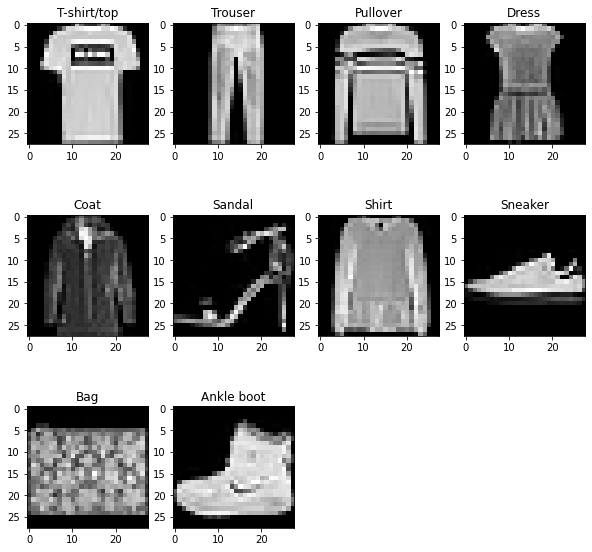

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.datasets import fashion_mnist
import tensorflow as tf
import tensorflow_datasets as tdfs
!pip install wandb
import wandb
wandb.login()

class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

class FashionMNIST:
    def __init__(self, X, Y):

        self.index = [0] * 10
        for i in range(10):
            self.index[i] = np.where(Y == i)[0][0]
    
    def plot_samples(self, X, Y):
        plt.figure(figsize=(10, 10))
        for j, i in enumerate(self.index):
            plt.subplot(3, 4, j+1)
            plt.imshow(X[i], cmap=plt.get_cmap('gray'))
            plt.title(class_names[Y[i]])
        plt.show()
    
    def log_samples(self, X, Y):
        wandb.log({'sample': [wandb.Image(X[i], caption=class_names[Y[i]]) for i in self.index]})
wandb.init(project="Question_")

fmnist = FashionMNIST(X_train, Y_train)
fmnist.plot_samples(X_train, Y_train)
fmnist.log_samples(X_train, Y_train)

# For Test Data
#fmnist = FashionMNIST(X_test, Y_test)
#fmnist.plot_samples(X_test, Y_test)
#fmnist.log_samples(X_test, Y_test)